# Read data

In [1]:
# Standard library imports
import warnings
from collections import Counter
from datetime import datetime, timedelta

# Third party imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from joblib import Parallel, delayed
from scipy.special import boxcox1p
from scipy.stats import boxcox, boxcox_normmax, skew, stats
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, f1_score, 
                             precision_recall_fscore_support, precision_score, recall_score, roc_auc_score)
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, PowerTransformer, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from tqdm.notebook import tqdm
from xgboost import XGBClassifier

# Optuna specific imports
import optuna
from optuna.visualization import plot_optimization_history
from optuna.exceptions import TrialPruned


from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN,MeanShift
from sklearn.cluster import SpectralClustering,AgglomerativeClustering,AffinityPropagation,Birch,MiniBatchKMeans,MeanShift 
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.metrics import classification_report
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
# Setting warnings to ignore FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
from collections import defaultdict
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from collections import defaultdict
# Import the necessary libraries
import numpy as np
import time
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_fscore_support, roc_auc_score, roc_curve
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from collections import defaultdict
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import time

In [2]:
df=pd.read_csv('../data/BitcoinHeistDataPreProcessed.csv')

In [3]:
df

,address,year,day,length,weight,count,looped,neighbors,income,n_address_feature,...,cybercrime_related,length_weight,count_looped,month,week,total_volume,average_volume,transaction_frequency,cluster,label
0,0.000253,0.857961,0.062835,0.627489,0.012028,0.000000,0.0,0.298088,0.277443,0.0,...,0.0,0.096372,0.0,0.000000,0.038482,0.232624,0.273815,0.000000,0.0,2
1,0.000894,0.715614,0.468752,0.791121,0.000356,0.000000,0.0,0.000000,0.277343,0.0,...,0.0,0.007715,0.0,0.406922,0.442411,0.232539,0.273717,0.000000,0.0,2
2,0.001092,0.715614,0.746693,0.000000,0.643462,0.000000,0.0,0.298088,0.404329,0.0,...,0.0,0.000000,0.0,0.722043,0.739832,0.343862,0.399690,0.000000,0.0,2
3,0.001307,0.715614,0.911565,0.879278,0.005668,0.000000,0.0,0.298088,0.206999,0.0,...,0.0,0.164511,0.0,0.864469,0.911197,0.172304,0.204123,0.000000,0.0,2
4,0.001620,0.715614,0.728573,1.000000,0.097573,0.950441,0.0,0.000000,0.404329,0.0,...,0.0,0.832317,0.0,0.647649,0.723597,0.343862,0.399690,0.913812,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2701898,0.940333,1.000000,0.928253,0.695205,0.643462,0.000000,0.0,0.298088,0.339108,0.0,...,0.0,0.911794,0.0,0.933001,0.926201,0.286241,0.334930,0.000000,0.0,3
2701899,0.938638,1.000000,0.928253,0.834516,0.057826,0.000000,0.0,0.298088,0.486375,0.0,...,0.0,0.583298,0.0,0.933001,0.926201,0.417838,0.481345,0.000000,0.0,3
2701900,0.043670,1.000000,0.928253,0.000000,0.142686,0.000000,0.0,0.000000,0.654789,0.0,...,0.0,0.000000,0.0,0.933001,0.926201,0.576069,0.649756,0.000000,0.0,3
2701901,0.879521,1.000000,0.928253,0.000000,0.643462,0.000000,0.0,0.000000,0.097552,0.0,...,0.0,0.000000,0.0,0.933001,0.926201,0.080349,0.096080,0.000000,0.0,3


In [4]:
df['label'].value_counts()

3    2671631
2      15256
1       8099
0       6917
Name: label, dtype: int64

the test set should represent real-world data distribution to correctly measure the model's performance.

In [5]:
# The label Montreal is encoded as 0
# The label Padua is encoded as 1
# The label Princeton is encoded as 2
# The label White is encoded as 3

# df1: designated ransomware (1)
# df2: other ransomwares (1)
# df3: white (0)

# Variable for designated attack
designated_attack = 2

# df1: designated attack (1)
df1 = df[df['label'] == designated_attack].copy()
df1['label'] = 1  # Transfer its original label to 1

# df2: other attacks (1)
df2 = df[(df['label'] != designated_attack) & (df['label'] != 3)].copy()
df2['label'] = 1  # Transfer other attacks’ label to 1

# df3: white (0)
df3 = df[df['label'] == 3].copy()

# Shuffle df3
df3 = df3.sample(frac=1, random_state=1)

# Calculate the number of samples for training and testing
num_train_samples = len(df2)
num_test_samples = len(df1)

# Split df3 into two parts for training and testing
df3_train = df3.iloc[:num_train_samples].copy()
#start at the row number equal to num_train_samples, and end at the row number equal to num_train_samples + num_test_samples".
df3_test = df3.iloc[num_train_samples:num_train_samples + num_test_samples].copy()

# Set the labels
df3_train['label'] = 0
df3_test['label'] = 0

# Create the training and testing dataframes
training_df = pd.concat([df2, df3_train])
test_df = pd.concat([df1, df3_test])

# For the training data
X_train = training_df.drop('label', axis=1)
y_train = training_df['label']

# For the test data
X_test = test_df.drop('label', axis=1)
y_test = test_df['label']

y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# The following are the tuned results of feature selection

In [6]:
# #Montreal
# selected_features = ['address', 'year', 'day', 'length', 'neighbors', 'income',
#        'n_address_feature', 'day_of_week', 'average_income_per_transaction',
#        'transaction_count', 'merge_behavior', 'length_weight', 'week',
#        'total_volume', 'average_volume', 'transaction_frequency']

# X_train = X_train[selected_features]
# X_test = X_test[selected_features]

# # Update the feature names to match the selected features
# selected_feature_names = X_train.columns
# print('Updated X_train with selected features: {}'.format(selected_feature_names))

# selected_feature_names = X_test.columns
# print('Updated X_test with selected features: {}'.format(selected_feature_names))

In [7]:
# #Padua
# selected_features = ['address', 'year', 'day', 'neighbors', 'income', 'n_address_feature',
#        'day_of_week', 'average_income_per_transaction', 'transaction_count',
#        'merge_behavior', 'week', 'total_volume', 'average_volume',
#        'transaction_frequency']

# X_train = X_train[selected_features]
# X_test = X_test[selected_features]

# # Update the feature names to match the selected features
# selected_feature_names = X_train.columns
# print('Updated X_train with selected features: {}'.format(selected_feature_names))

# selected_feature_names = X_test.columns
# print('Updated X_test with selected features: {}'.format(selected_feature_names))

In [8]:
# # Princeton
# selected_features = ['address', 'year', 'day', 'length', 'weight', 'neighbors', 'income',
#        'n_address_feature', 'day_of_week', 'average_income_per_transaction',
#        'transaction_count', 'looped_ratio', 'total_volume', 'average_volume',
#        'transaction_frequency']

# X_train = X_train[selected_features]
# X_test = X_test[selected_features]

# # Update the feature names to match the selected features
# selected_feature_names = X_train.columns
# print('Updated X_train with selected features: {}'.format(selected_feature_names))

# selected_feature_names = X_test.columns
# print('Updated X_test with selected features: {}'.format(selected_feature_names))

# Feature selection

Original features: Index(['address', 'year', 'day', 'length', 'weight', 'count', 'looped',
       'neighbors', 'income', 'n_address_feature', 'quarter_number',
       'is_close_to_holiday', 'day_of_week', 'average_income_per_transaction',
       'transaction_count', 'looped_ratio', 'merge_behavior',
       'cybercrime_related', 'length_weight', 'count_looped', 'month', 'week',
       'total_volume', 'average_volume', 'transaction_frequency', 'cluster'],
      dtype='object')
Selected features: Index(['address', 'year', 'day', 'length', 'weight', 'neighbors', 'income',
       'n_address_feature', 'day_of_week', 'average_income_per_transaction',
       'transaction_count', 'looped_ratio', 'total_volume', 'average_volume',
       'transaction_frequency'],
      dtype='object')
Not selected features: Index(['count', 'looped', 'quarter_number', 'is_close_to_holiday',
       'merge_behavior', 'cybercrime_related', 'length_weight', 'count_looped',
       'month', 'week', 'cluster'],
      dty

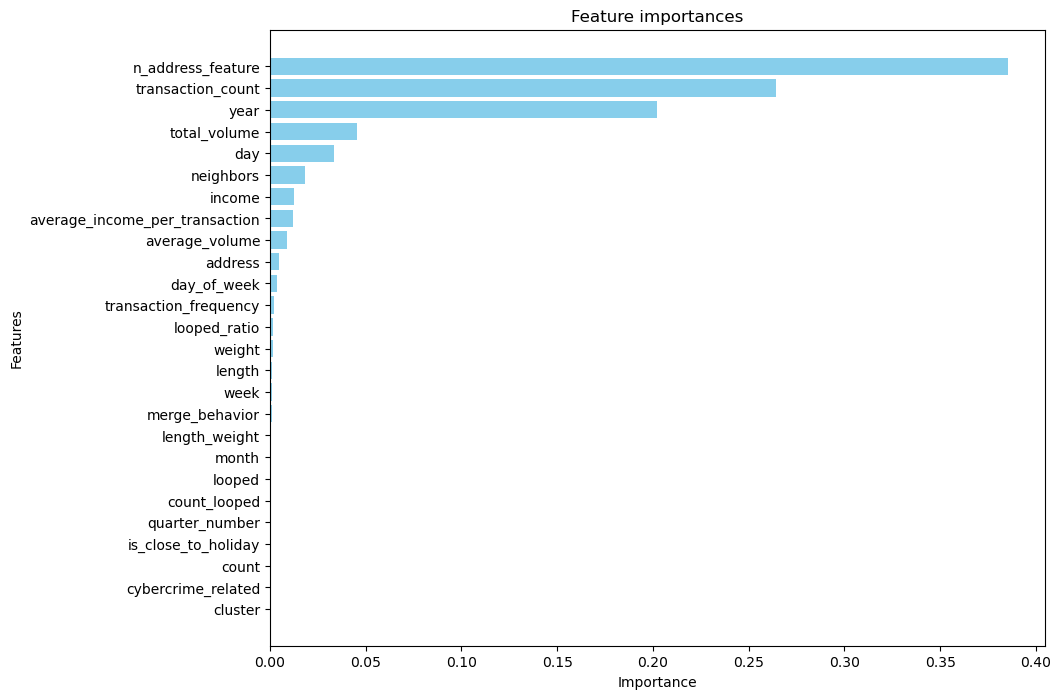

In [9]:
# Feature selection
gb = GradientBoostingClassifier(n_estimators=100)
gb.fit(X_train, y_train)  # Fit on the training data

# Print the feature names before selection
original_feature_names = X_train.columns  # Get feature names from the training data
print('Original features: {}'.format(original_feature_names))

# Get feature importances
importances = gb.feature_importances_

# Create a boolean mask of features selected by the model
mask = importances > 0.001  # adjust threshold as needed

# Apply the mask to the feature dataset
X_train_new = X_train.loc[:, mask]  # Apply mask to the training data
X_test_new = X_test.loc[:, mask]  # Apply the same mask to the testing data

# Print the selected feature names
selected_feature_names = X_train_new.columns
print('Selected features: {}'.format(selected_feature_names))

# Print the features that are not selected
not_selected_feature_names = original_feature_names[~mask]
print('Not selected features: {}'.format(not_selected_feature_names))

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'feature': original_feature_names, 'importance': importances})

# Sort feature importances in descending order
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Plot feature importances with feature names
plt.figure(figsize=(10, 8))
plt.barh(feature_importances['feature'], feature_importances['importance'], color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature importances")
plt.gca().invert_yaxis()  # Reverse the order of features

# # Save the figure as a PDF
# plt.savefig('feature_importances.pdf', format='pdf', bbox_inches='tight')

# If you want to display the plot in the notebook after saving, uncomment the following line:
plt.show()

In [10]:
# Create copies of the original X_train and X_test
X_train_initial = X_train.copy()
X_test_initial = X_test.copy()

[I 2023-06-29 13:34:31,072] A new study created in memory with name: no-name-63e92ebc-b54c-4a4a-892e-675172c0b160


Original features: Index(['address', 'year', 'day', 'length', 'weight', 'count', 'looped',
       'neighbors', 'income', 'n_address_feature', 'quarter_number',
       'is_close_to_holiday', 'day_of_week', 'average_income_per_transaction',
       'transaction_count', 'looped_ratio', 'merge_behavior',
       'cybercrime_related', 'length_weight', 'count_looped', 'month', 'week',
       'total_volume', 'average_volume', 'transaction_frequency', 'cluster'],
      dtype='object')


[I 2023-06-29 13:34:35,115] Trial 0 finished with value: 0.9463572189664358 and parameters: {'threshold': 0.002344289152015073}. Best is trial 0 with value: 0.9463572189664358.
[I 2023-06-29 13:34:38,352] Trial 1 finished with value: 0.9452583910495471 and parameters: {'threshold': 0.006612832739137784}. Best is trial 0 with value: 0.9463572189664358.
[I 2023-06-29 13:34:42,756] Trial 2 finished with value: 0.9459909429941395 and parameters: {'threshold': 0.002070893953757065}. Best is trial 0 with value: 0.9463572189664358.
[I 2023-06-29 13:34:46,752] Trial 3 finished with value: 0.9455580713905167 and parameters: {'threshold': 0.004117467276652652}. Best is trial 0 with value: 0.9463572189664358.
[I 2023-06-29 13:34:50,815] Trial 4 finished with value: 0.9463572189664358 and parameters: {'threshold': 0.0036798103926900605}. Best is trial 0 with value: 0.9463572189664358.
[I 2023-06-29 13:34:54,043] Trial 5 finished with value: 0.9452583910495471 and parameters: {'threshold': 0.006175

Best threshold: 0.0010623581252465894
Best score: 0.9471896643580181
Selected features: Index(['address', 'year', 'day', 'length', 'weight', 'neighbors', 'income',
       'n_address_feature', 'day_of_week', 'average_income_per_transaction',
       'transaction_count', 'looped_ratio', 'total_volume', 'average_volume',
       'transaction_frequency'],
      dtype='object')
Not selected features: Index(['count', 'looped', 'quarter_number', 'is_close_to_holiday',
       'merge_behavior', 'cybercrime_related', 'length_weight', 'count_looped',
       'month', 'week', 'cluster'],
      dtype='object')


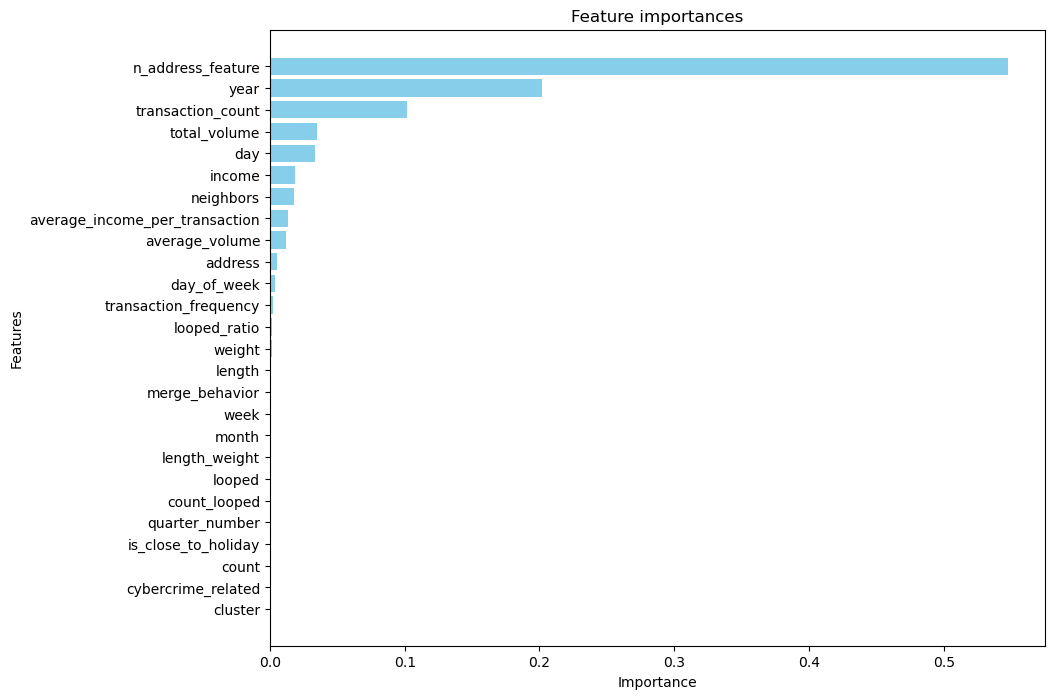

In [11]:
# Feature selection
gb = GradientBoostingClassifier(n_estimators=100)
gb.fit(X_train, y_train)  # Fit on the training data

# Print the feature names before selection
original_feature_names = X_train.columns  # Get feature names from the training data
print('Original features: {}'.format(original_feature_names))

# Get feature importances
importances = gb.feature_importances_

# Define an objective function to be minimized.
def objective(trial, X_train, y_train):
    # Suggest a threshold for the feature selection
    threshold = trial.suggest_float('threshold', 0, 0.01)

    # Create a mask for the current threshold
    mask = importances > threshold

    # Apply the mask to the training data
    X_train_new = X_train.loc[:, mask]
    
    # If all features are filtered out, return a large negative value
    if X_train_new.empty:
        return -1e9
    
    # Fit the model and evaluate its performance
    gb.fit(X_train_new, y_train)
    score = gb.score(X_train_new, y_train)

    # Return the score
    return score

# Create a study object and optimize the objective function.
study = optuna.create_study(direction='maximize')
study.optimize(lambda trial: objective(trial, X_train, y_train), n_trials=30)

# Get the best trial
best_trial = study.best_trial

print('Best threshold: {}'.format(best_trial.params['threshold']))
print('Best score: {}'.format(best_trial.value))

# Apply the best threshold to the feature dataset
mask = importances > best_trial.params['threshold']
X_train_new = X_train.loc[:, mask]  # Apply mask to the training data
X_test_new = X_test.loc[:, mask]  # Apply the same mask to the testing data

# Print the selected feature names
selected_feature_names = X_train_new.columns
print('Selected features: {}'.format(selected_feature_names))

# Print the features that are not selected
not_selected_feature_names = original_feature_names[~mask]
print('Not selected features: {}'.format(not_selected_feature_names))

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'feature': original_feature_names, 'importance': importances})

# Sort feature importances in descending order
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Plot feature importances with feature names
plt.figure(figsize=(10, 8))
plt.barh(feature_importances['feature'], feature_importances['importance'], color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature importances")
plt.gca().invert_yaxis()  # Reverse the order of features

# Save the figure as a PDF
plt.savefig('feature_importances_Princeton.pdf', format='pdf', bbox_inches='tight')

# If you want to display the plot in the notebook after saving, uncomment the following line:
plt.show()

In [12]:
# Transfer X_train_new to X_train
X_train = X_train_new.copy()

# Transfer X_test_new to X_test
X_test = X_test_new.copy()

# Update the feature names to match the selected features
selected_feature_names = X_train.columns
print('Updated X_train with selected features: {}'.format(selected_feature_names))

selected_feature_names = X_test.columns
print('Updated X_test with selected features: {}'.format(selected_feature_names))

Updated X_train with selected features: Index(['address', 'year', 'day', 'length', 'weight', 'neighbors', 'income',
       'n_address_feature', 'day_of_week', 'average_income_per_transaction',
       'transaction_count', 'looped_ratio', 'total_volume', 'average_volume',
       'transaction_frequency'],
      dtype='object')
Updated X_test with selected features: Index(['address', 'year', 'day', 'length', 'weight', 'neighbors', 'income',
       'n_address_feature', 'day_of_week', 'average_income_per_transaction',
       'transaction_count', 'looped_ratio', 'total_volume', 'average_volume',
       'transaction_frequency'],
      dtype='object')


In [13]:
# # If you want to revert back to the initial X_train and X_test(optional):
# X_train = X_train_initial.copy()
# X_test = X_test_initial.copy()

In [14]:
df1['label'].value_counts()

1    15256
Name: label, dtype: int64

In [15]:
df2['label'].value_counts()

1    15016
Name: label, dtype: int64

In [16]:
df3['label'].value_counts()

3    2671631
Name: label, dtype: int64

In [17]:
training_df['label'].value_counts()

1    15016
0    15016
Name: label, dtype: int64

In [18]:
test_df['label'].value_counts()

1    15256
0    15256
Name: label, dtype: int64

# Apply the cluster labeling (CL) k-means method

1. **Unsupervised Phase:** Use K-means to cluster the training data into K clusters. This process is unsupervised and only depends on the feature space. The assumption here is that normal data will form dense clusters, while anomalies will not belong well to any cluster or form sparse clusters.

2. **Labeling Phase:** After clustering, label each cluster based on the known class of its members from the training data. For example, if a cluster has a majority of normal instances, label that cluster as 'normal'. If a cluster has a majority of anomalies, label it as 'anomalous'. For clusters with mixed membership, you may label them based on the majority class or consider them as 'anomalous' if a significant proportion of its members are anomalies. This can help capture regions of the feature space where anomalies occur often.

3. **Supervised Phase:** When a new instance arrives, you can assign it to the closest cluster and label it according to the label of that cluster. This becomes a form of supervised learning since we're now classifying the instance based on the labels assigned to the clusters.


True Positives (TP): These are the instances that were actually positive and the model correctly predicted them as positive. In this case, these are the instances where the actual label was 1 (attack) and the model also predicted them as 1.

True Negatives (TN): These are the instances that were actually negative and the model correctly predicted them as negative. In this case, these are the instances where the actual label was 0 (normal) and the model also predicted them as 0.

False Positives (FP): These are the instances that were actually negative but the model incorrectly predicted them as positive. In this case, these are the instances where the actual label was 0 (normal) but the model predicted them as 1 (attack).

False Negatives (FN): These are the instances that were actually positive but the model incorrectly predicted them as negative. In this case, these are the instances where the actual label was 1 (attack) but the model predicted them as 0 (normal).

In [19]:
# 0 is normal, 1 is attack
# a is attack, b is normal (the number of attack or normal in each cluster)
# list1 is normal, list2 is attack (the list to store labeled cluster)

def CL_kmeans(X_train, X_test, y_train, y_test, n, b=100):
    km_cluster = MiniBatchKMeans(n_clusters=n, batch_size=b, random_state=0)
    y_train_pred = km_cluster.fit_predict(X_train) # Prediction1: predict which cluster the training data belongs to
    # calculate the internal attack or white number
    a = np.zeros(n)
    b = np.zeros(n)
    for v in range(n):
        a[v] = np.sum((y_train_pred == v) & (y_train == 1))
        b[v] = np.sum((y_train_pred == v) & (y_train == 0))
    # label each cluster
    list1 = np.where(a <= b)[0]
    list2 = np.where(a > b)[0]
#     print(list1)
#     print(list2)
    
    # Prediction2: start prediction (predict the label)
    start_time = time.time()
    result_ClusterPrediction_test = km_cluster.predict(X_test)
    y_test_pred = np.where(np.isin(result_ClusterPrediction_test, list1), 0, 1)
    end_time = time.time()
    prediction_time = end_time - start_time

    epsilon = 1e-10  # small constant
    cluster_confidence = np.where(a <= b, b / (a + b + epsilon), a / (a + b + epsilon))
    confidence_test = cluster_confidence[result_ClusterPrediction_test]
    confidence_train = cluster_confidence[y_train_pred]

    cm = confusion_matrix(y_test, y_test_pred)
    acc = accuracy_score(y_test, y_test_pred)

    cluster_to_confidence_count = defaultdict(int)
    for i, cluster in enumerate(result_ClusterPrediction_test):
        cluster_to_confidence_count[(cluster, confidence_test[i])] += 1
        
    # Reset the index of y_test and X_test
    y_test = y_test.reset_index(drop=True)
    X_test = X_test.reset_index(drop=True)

    # Reset the index of y_train and X_train
    y_train = y_train.reset_index(drop=True)
    X_train = X_train.reset_index(drop=True)

    # Predict labels for training data
    y_train_pred_label = np.where(np.isin(y_train_pred, list1), 0, 1)

    # Get instances of TP, TN, FP, FN
    TP_instances = X_train[(y_train == 1) & (y_train_pred_label == 1)]
    TN_instances = X_train[(y_train == 0) & (y_train_pred_label == 0)]
    FP_instances = X_train[(y_train == 0) & (y_train_pred_label == 1)]
    FN_instances = X_train[(y_train == 1) & (y_train_pred_label == 0)]

    return confidence_train, confidence_test, cm, cluster_confidence, y_test_pred, acc, cluster_to_confidence_count, TP_instances, TN_instances, FP_instances, FN_instances, prediction_time

Accuracy: 0.44795490298898794
Prediction time: 0.0030930042266845703 seconds
Precision: 0.27761435950219016
Recall: 0.44795490298898794
F1 score: 0.31720490586075123


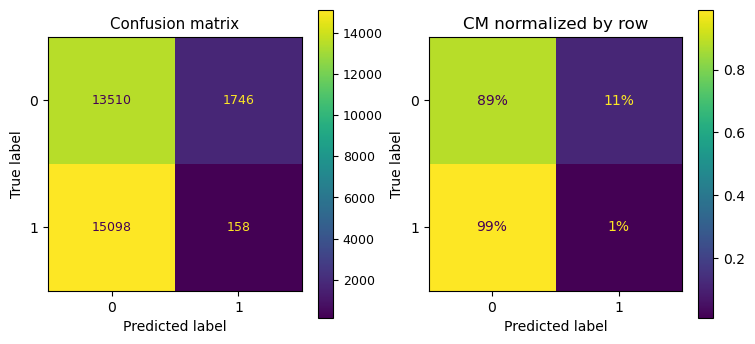

<Figure size 640x480 with 0 Axes>

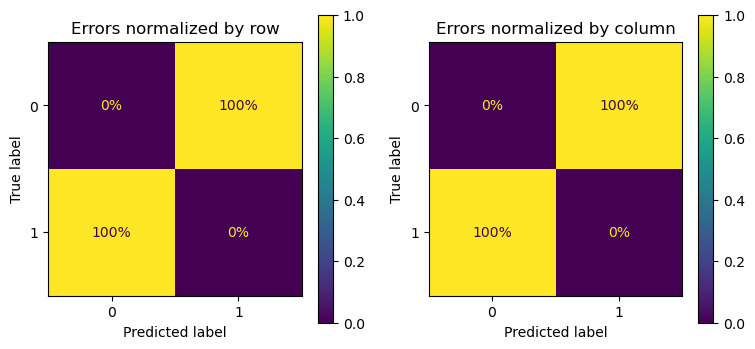

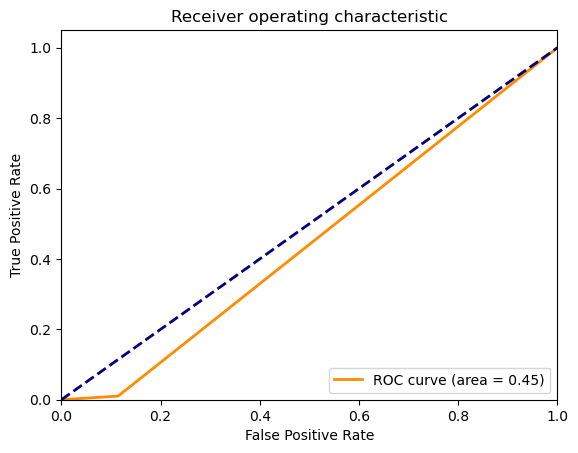

In [20]:
# Apply the modified CL_kmeans function
confidence_train, confidence_test, cm, cluster_confidence, y_test_pred, acc, cluster_to_confidence_count, TP_instances, TN_instances, FP_instances, FN_instances, prediction_time = CL_kmeans(X_train, X_test, y_train, y_test,20)

# Calculate metrics
precision, recall, f_score, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')

print('Accuracy:', acc)
print('Prediction time:', prediction_time, 'seconds')
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f_score)

# Confusion Matrix and save it as PDF
sample_weight = (y_test_pred != y_test)

with PdfPages('KMeans_Confusion_matrix_Princeton.pdf') as pdf:
    # Part 1
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
    plt.rc('font', size=9)
    ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, ax=axs[0])
    axs[0].set_title("Confusion matrix")
    plt.rc('font', size=10)
    ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, normalize="true", values_format=".0%", ax=axs[1])
    axs[1].set_title("CM normalized by row")
    plt.show()
    pdf.savefig(fig)  # saves the current figure into a pdf page

    plt.clf()  # clear the figure for the next plot

    # Part 2
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
    plt.rc('font', size=10)
    ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, sample_weight=sample_weight, normalize="true", values_format=".0%", ax=axs[0])
    axs[0].set_title("Errors normalized by row")
    ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, sample_weight=sample_weight, normalize="pred", values_format=".0%", ax=axs[1])
    axs[1].set_title("Errors normalized by column")
    plt.show()
    pdf.savefig(fig)  # saves the current figure into a pdf page

# ROC Curve and save it as PDF
roc_auc = roc_auc_score(y_test, y_test_pred)
fpr, tpr, _ = roc_curve(y_test, y_test_pred)

with PdfPages('KMeans_roc_Princeton.pdf') as pdf:
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    pdf.savefig(plt.gcf())  # Save the figure to PDF first
    plt.show()  # Then display the figure


[I 2023-06-29 13:36:46,576] A new study created in memory with name: no-name-1dcc8871-0aa4-4a5c-90c9-534cd11a9b62
[I 2023-06-29 13:36:47,344] Trial 0 finished with value: 0.4734202936549554 and parameters: {'n': 552}. Best is trial 0 with value: 0.4734202936549554.
[I 2023-06-29 13:36:48,710] Trial 1 finished with value: 0.48669375983219715 and parameters: {'n': 957}. Best is trial 1 with value: 0.48669375983219715.
[I 2023-06-29 13:36:50,507] Trial 2 finished with value: 0.49918065023597274 and parameters: {'n': 874}. Best is trial 2 with value: 0.49918065023597274.
[I 2023-06-29 13:36:52,072] Trial 3 finished with value: 0.4985907184058731 and parameters: {'n': 954}. Best is trial 2 with value: 0.49918065023597274.
[I 2023-06-29 13:36:52,421] Trial 4 finished with value: 0.45139617199790244 and parameters: {'n': 366}. Best is trial 2 with value: 0.49918065023597274.
[I 2023-06-29 13:36:53,627] Trial 5 finished with value: 0.5072430519140011 and parameters: {'n': 835}. Best is trial 5

[I 2023-06-29 13:37:53,299] Trial 53 finished with value: 0.4798767697954903 and parameters: {'n': 837}. Best is trial 23 with value: 0.5117986366019927.
[I 2023-06-29 13:37:55,523] Trial 54 finished with value: 0.48931567907708445 and parameters: {'n': 758}. Best is trial 23 with value: 0.5117986366019927.
[I 2023-06-29 13:37:56,273] Trial 55 finished with value: 0.47374803356056633 and parameters: {'n': 722}. Best is trial 23 with value: 0.5117986366019927.
[I 2023-06-29 13:37:58,990] Trial 56 finished with value: 0.512650760356581 and parameters: {'n': 896}. Best is trial 56 with value: 0.512650760356581.
[I 2023-06-29 13:38:01,489] Trial 57 finished with value: 0.48718536969061355 and parameters: {'n': 903}. Best is trial 56 with value: 0.512650760356581.
[I 2023-06-29 13:38:03,130] Trial 58 finished with value: 0.49868904037755635 and parameters: {'n': 990}. Best is trial 56 with value: 0.512650760356581.
[I 2023-06-29 13:38:04,476] Trial 59 finished with value: 0.5085867855270058


Best parameters:
{'n': 896}
Accuracy: 0.512650760356581
Prediction time: 0.014245271682739258 seconds
Precision: 0.5302458863487508
Recall: 0.512650760356581
F1 score: 0.42971138162110234


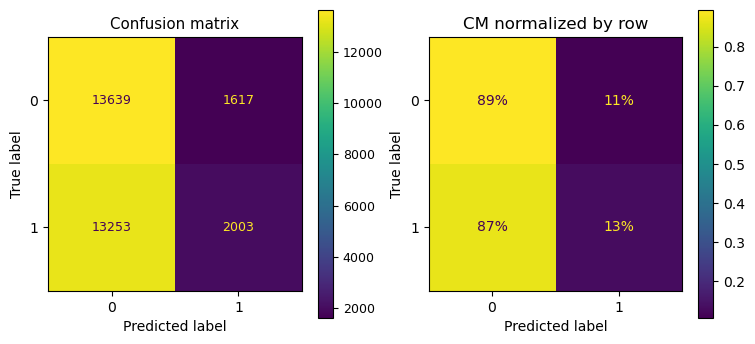

<Figure size 640x480 with 0 Axes>

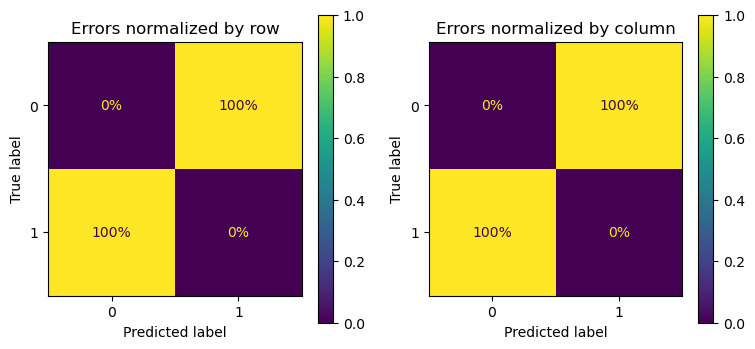

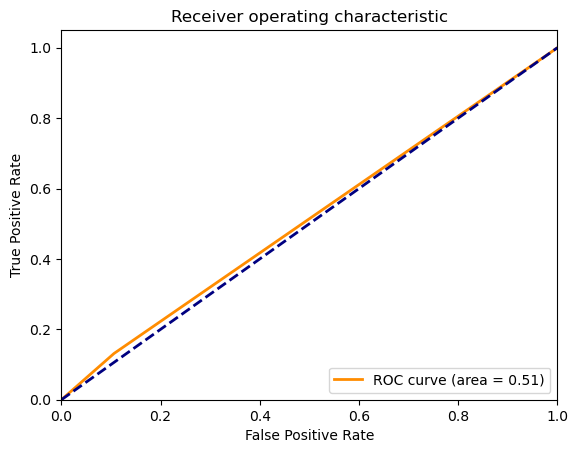

In [21]:
import optuna

def objective(trial):
    n = trial.suggest_int('n', 2, 1000)  # suggest a value for n between 1 and 200

    # Call the modified CL_kmeans function
    _, _, _, _, y_test_pred, acc, _, _, _, _, _,_ = CL_kmeans(X_train, X_test, y_train, y_test, n)

    # Return the accuracy
    return acc

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best parameters
print("\nBest parameters:")
print(study.best_params)

# Call the modified CL_kmeans function with the best parameters
confidence_train, confidence_test, cm, cluster_confidence, y_test_pred, acc, cluster_to_confidence_count, TP_instances, TN_instances, FP_instances, FN_instances, prediction_time = CL_kmeans(X_train, X_test, y_train, y_test, study.best_params['n'])

# Calculate metrics
precision, recall, f_score, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')

print('Accuracy:', acc)
print('Prediction time:', prediction_time, 'seconds')
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f_score)

# Confusion Matrix and save it as PDF
sample_weight = (y_test_pred != y_test)

with PdfPages('KMeans_Confusion_matrix_Princeton_tuned.pdf') as pdf:
    # Part 1
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
    plt.rc('font', size=9)
    ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, ax=axs[0])
    axs[0].set_title("Confusion matrix")
    plt.rc('font', size=10)
    ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, normalize="true", values_format=".0%", ax=axs[1])
    axs[1].set_title("CM normalized by row")
    plt.show()
    pdf.savefig(fig)  # saves the current figure into a pdf page

    plt.clf()  # clear the figure for the next plot

    # Part 2
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
    plt.rc('font', size=10)
    ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, sample_weight=sample_weight, normalize="true", values_format=".0%", ax=axs[0])
    axs[0].set_title("Errors normalized by row")
    ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, sample_weight=sample_weight, normalize="pred", values_format=".0%", ax=axs[1])
    axs[1].set_title("Errors normalized by column")
    plt.show()
    pdf.savefig(fig)  # saves the current figure into a pdf page

# ROC Curve and save it as PDF
roc_auc = roc_auc_score(y_test, y_test_pred)
fpr, tpr, _ = roc_curve(y_test, y_test_pred)

with PdfPages('KMeans_roc_Princeton_tuned.pdf') as pdf:
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    pdf.savefig(plt.gcf())  # Save the figure to PDF first
    plt.show()  # Then display the figure

# Apply the CL-k-means model with biased classifiers

In [22]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
import numpy as np

def CL_kmeans_with_biasedClassifer(X_train, X_test, y_train, y_test, n, threshold, b=100):
    # Reset the index
    X_train = X_train.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)

    # Run the original CL_kmeans function
    confidence_train, confidence_test, cm, cluster_confidence, y_test_pred, acc, cluster_to_confidence_count, TP_instances, TN_instances, FP_instances, FN_instances, prediction_time = CL_kmeans(X_train, X_test, y_train, y_test, n, b)
    
    # Get the same amount of randomly sampled normal and attack data
    if len(FN_instances) <= len(TN_instances) and len(FP_instances) <= len(TP_instances):
        normal_data = resample(TN_instances, n_samples=len(FN_instances),random_state=0)
        attack_data = resample(TP_instances, n_samples=len(FP_instances),random_state=0)
    else:
        print("FN_instances or FP_instances is larger than TN_instances or TP_instances. Please check your data.")

    
    # Train the first biased classifier, B1, on all the FN_instances along with the same amount of randomly sampled normal data
    B1 = XGBClassifier(random_state=0)
    B1.fit(np.concatenate((FN_instances, normal_data)), np.concatenate((np.ones(len(FN_instances)), np.zeros(len(normal_data)))))
    
    # Train the second biased classifier, B2, on all the FP_instances along with the same amount of randomly sampled attack data
    B2 = XGBClassifier(random_state=0)
    B2.fit(np.concatenate((FP_instances, attack_data)), np.concatenate((np.zeros(len(FP_instances)), np.ones(len(attack_data)))))
    
    start_time1 = time.time()
    # Apply the biased classifiers to the test data
    y_test_pred_B1 = B1.predict(X_test)
    y_test_pred_B2 = B2.predict(X_test)
    # If the confidence is lower than the threshold, pass the uncertain instance to B1 or B2
    y_test_pred_final = np.where(confidence_test < threshold, np.where(y_test_pred == 0, y_test_pred_B1, y_test_pred_B2), y_test_pred)
    end_time1 = time.time()
    prediction_time=prediction_time+end_time1-start_time1
    
    
    return y_test_pred_final, prediction_time


Accuracy: 0.44795490298898794
Prediction time: 0.02752208709716797 seconds
Precision: 0.27761435950219016
Recall: 0.44795490298898794
F1 score: 0.31720490586075123


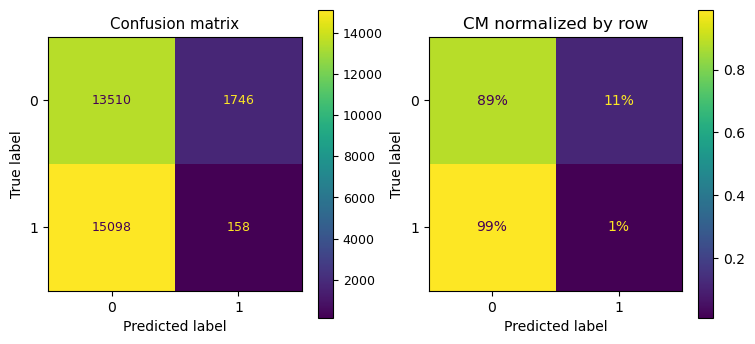

<Figure size 640x480 with 0 Axes>

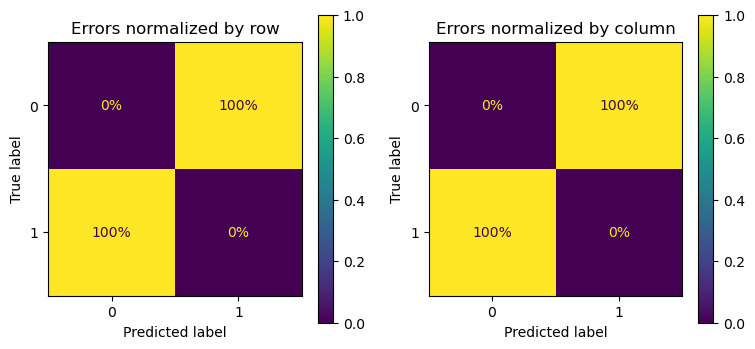

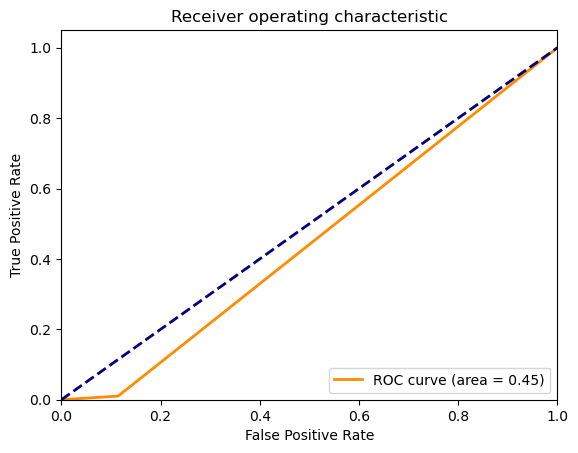

In [23]:
# Apply the modified CL_kmeans function
y_test_pred_final, prediction_time = CL_kmeans_with_biasedClassifer(X_train, X_test, y_train, y_test, 20, threshold=0.5)

# Calculate metrics
precision, recall, f_score, _ = precision_recall_fscore_support(y_test, y_test_pred_final, average='weighted')
acc = accuracy_score(y_test, y_test_pred_final)

print('Accuracy:', acc)
print('Prediction time:', prediction_time, 'seconds')
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f_score)

# Confusion Matrix and save it as PDF
sample_weight = (y_test_pred_final != y_test)

with PdfPages('BiasedClassifier_KMeans_Confusion_matrix_Princeton.pdf') as pdf:
    # Part 1
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
    plt.rc('font', size=9)
    ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_final, ax=axs[0])
    axs[0].set_title("Confusion matrix")
    plt.rc('font', size=10)
    ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_final, normalize="true", values_format=".0%", ax=axs[1])
    axs[1].set_title("CM normalized by row")
    plt.show()
    pdf.savefig(fig)  # saves the current figure into a pdf page

    plt.clf()  # clear the figure for the next plot

    # Part 2
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
    plt.rc('font', size=10)
    ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_final, sample_weight=sample_weight, normalize="true", values_format=".0%", ax=axs[0])
    axs[0].set_title("Errors normalized by row")
    ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_final, sample_weight=sample_weight, normalize="pred", values_format=".0%", ax=axs[1])
    axs[1].set_title("Errors normalized by column")
    plt.show()
    pdf.savefig(fig)  # saves the current figure into a pdf page

# ROC Curve and save it as PDF
roc_auc = roc_auc_score(y_test, y_test_pred_final)
fpr, tpr, _ = roc_curve(y_test, y_test_pred_final)

with PdfPages('BiasedClassifier_KMeans_roc_Princeton.pdf') as pdf:
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    pdf.savefig(plt.gcf())  # Save the figure to PDF first
    plt.show()  # Then display the figure


[I 2023-06-29 13:39:01,850] A new study created in memory with name: no-name-14c9e8a2-4b7c-4632-b682-f818364e59b4
[I 2023-06-29 13:39:04,483] Trial 0 finished with value: 0.5373623492396434 and parameters: {'n': 985, 'threshold': 0.7584656061385198}. Best is trial 0 with value: 0.5373623492396434.
[I 2023-06-29 13:39:06,435] Trial 1 finished with value: 0.6090062926061878 and parameters: {'n': 781, 'threshold': 0.9400219713708629}. Best is trial 1 with value: 0.6090062926061878.
[I 2023-06-29 13:39:08,292] Trial 2 finished with value: 0.482302045097011 and parameters: {'n': 752, 'threshold': 0.4915919752436662}. Best is trial 1 with value: 0.6090062926061878.
[I 2023-06-29 13:39:09,502] Trial 3 finished with value: 0.4684714210802307 and parameters: {'n': 372, 'threshold': 0.5946559272474794}. Best is trial 1 with value: 0.6090062926061878.
[I 2023-06-29 13:39:10,533] Trial 4 finished with value: 0.48702149973780806 and parameters: {'n': 290, 'threshold': 0.7101019556172592}. Best is t

[I 2023-06-29 13:40:07,627] Trial 44 finished with value: 0.563614315679077 and parameters: {'n': 473, 'threshold': 0.871691751044426}. Best is trial 24 with value: 0.6181830099632931.
[I 2023-06-29 13:40:08,925] Trial 45 finished with value: 0.600419507079182 and parameters: {'n': 626, 'threshold': 0.9409415138415169}. Best is trial 24 with value: 0.6181830099632931.
[I 2023-06-29 13:40:10,218] Trial 46 finished with value: 0.6207393812270582 and parameters: {'n': 707, 'threshold': 0.9731783976218474}. Best is trial 46 with value: 0.6207393812270582.
[I 2023-06-29 13:40:11,851] Trial 47 finished with value: 0.5837375458835868 and parameters: {'n': 699, 'threshold': 0.8970453905653358}. Best is trial 46 with value: 0.6207393812270582.
[I 2023-06-29 13:40:14,346] Trial 48 finished with value: 0.6189695857367593 and parameters: {'n': 765, 'threshold': 0.9702299332211004}. Best is trial 46 with value: 0.6207393812270582.
[I 2023-06-29 13:40:16,464] Trial 49 finished with value: 0.55145516

[I 2023-06-29 13:40:59,261] Trial 88 finished with value: 0.6230991085474568 and parameters: {'n': 2, 'threshold': 0.9295704827735124}. Best is trial 72 with value: 0.6244100681699004.
[I 2023-06-29 13:41:00,034] Trial 89 finished with value: 0.6203788673308862 and parameters: {'n': 80, 'threshold': 0.9830976158564704}. Best is trial 72 with value: 0.6244100681699004.
[I 2023-06-29 13:41:00,964] Trial 90 finished with value: 0.6053356056633455 and parameters: {'n': 131, 'threshold': 0.9494855724223912}. Best is trial 72 with value: 0.6244100681699004.
[I 2023-06-29 13:41:01,808] Trial 91 finished with value: 0.6230991085474568 and parameters: {'n': 41, 'threshold': 0.9954000125352804}. Best is trial 72 with value: 0.6244100681699004.
[I 2023-06-29 13:41:02,660] Trial 92 finished with value: 0.6230991085474568 and parameters: {'n': 22, 'threshold': 0.995793686476476}. Best is trial 72 with value: 0.6244100681699004.
[I 2023-06-29 13:41:03,451] Trial 93 finished with value: 0.60992396434


Best parameters:
{'n': 108, 'threshold': 0.9833550588797267}
Accuracy: 0.6277530152071317
Prediction time: 0.02047586441040039 seconds
Precision: 0.7026322478783
Recall: 0.6277530152071317
F1 score: 0.5898632881319523


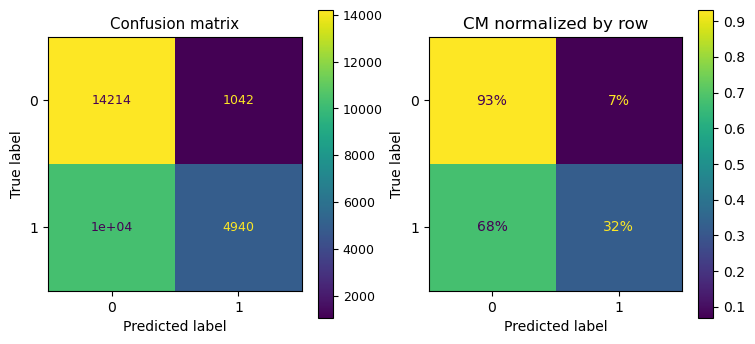

<Figure size 640x480 with 0 Axes>

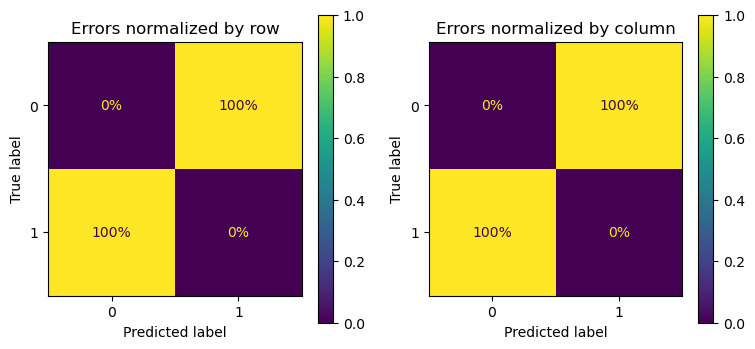

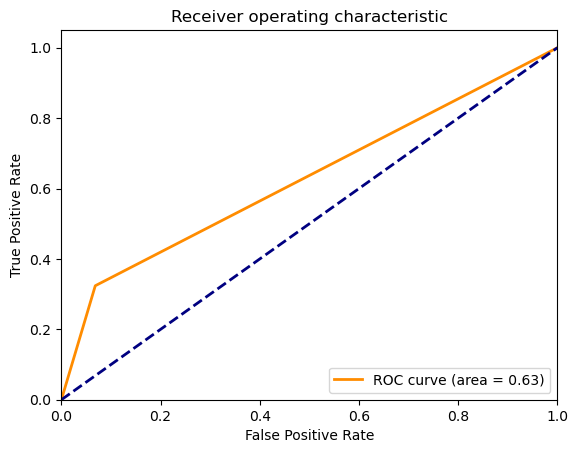

In [24]:
import optuna
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def objective(trial):
    n = trial.suggest_int('n', 2, 1000)  # suggest a value for n between 1 and 50
    threshold = trial.suggest_uniform('threshold', 0.2, 1)  # suggest a value for threshold between 0.1 and 1

    # Run the function and get the predicted labels
    y_test_pred_final,prediction_time = CL_kmeans_with_biasedClassifer(X_train, X_test, y_train, y_test, n, threshold)

    # Calculate the accuracy score
    score = accuracy_score(y_test, y_test_pred_final)

    return score

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best parameters
print("\nBest parameters:")
print(study.best_params)

# Apply the modified CL_kmeans function
y_test_pred_final, prediction_time = CL_kmeans_with_biasedClassifer(X_train, X_test, y_train, y_test, study.best_params['n'], study.best_params['threshold'])

# Calculate metrics
precision, recall, f_score, _ = precision_recall_fscore_support(y_test, y_test_pred_final, average='weighted')
acc = accuracy_score(y_test, y_test_pred_final)

print('Accuracy:', acc)
print('Prediction time:', prediction_time, 'seconds')
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f_score)

# Confusion Matrix and save it as PDF
sample_weight = (y_test_pred_final != y_test)

with PdfPages('BiasedClassifier_KMeans_Confusion_matrix_Princeton_tuned.pdf') as pdf:
    # Part 1
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
    plt.rc('font', size=9)
    ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_final, ax=axs[0])
    axs[0].set_title("Confusion matrix")
    plt.rc('font', size=10)
    ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_final, normalize="true", values_format=".0%", ax=axs[1])
    axs[1].set_title("CM normalized by row")
    plt.show()
    pdf.savefig(fig)  # saves the current figure into a pdf page

    plt.clf()  # clear the figure for the next plot

    # Part 2
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
    plt.rc('font', size=10)
    ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_final, sample_weight=sample_weight, normalize="true", values_format=".0%", ax=axs[0])
    axs[0].set_title("Errors normalized by row")
    ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_final, sample_weight=sample_weight, normalize="pred", values_format=".0%", ax=axs[1])
    axs[1].set_title("Errors normalized by column")
    plt.show()
    pdf.savefig(fig)  # saves the current figure into a pdf page

# ROC Curve and save it as PDF
roc_auc = roc_auc_score(y_test, y_test_pred_final)
fpr, tpr, _ = roc_curve(y_test, y_test_pred_final)

with PdfPages('BiasedClassifier_KMeans_roc_Princeton_tuned.pdf') as pdf:
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    pdf.savefig(plt.gcf())  # Save the figure to PDF first
    plt.show()  # Then display the figure


True Positives (TP): These are the instances that were actually positive and the model correctly predicted them as positive. In this case, these are the instances where the actual label was 1 (attack) and the model also predicted them as 1.

True Negatives (TN): These are the instances that were actually negative and the model correctly predicted them as negative. In this case, these are the instances where the actual label was 0 (normal) and the model also predicted them as 0.

False Positives (FP): These are the instances that were actually negative but the model incorrectly predicted them as positive. In this case, these are the instances where the actual label was 0 (normal) but the model predicted them as 1 (attack).

False Negatives (FN): These are the instances that were actually positive but the model incorrectly predicted them as negative. In this case, these are the instances where the actual label was 1 (attack) but the model predicted them as 0 (normal).




This confusion matrix can be interpreted as follows:

True Positives (TP): 5197 (These are the cases in which we predicted yes (they have the condition), and they do have the condition.)
True Negatives (TN): 14109 (We predicted no, and they don't have the condition.)
False Positives (FP): 1147 (We predicted yes, but they don't actually have the condition. Also known as "Type I error.")
False Negatives (FN): 10059 (We predicted no, but they actually do have the condition. This is also known as "Type II error.")

In anomaly detection, the importance of false positives versus false negatives often depends on the specific application and the costs associated with each type of error. 

However, in many cases, false positives are considered more critical in anomaly detection. Here's why:

1. **Alert Fatigue**: Anomaly detection systems are often used in monitoring systems (like intrusion detection, fraud detection, or health monitoring systems). If the system generates too many false positives (i.e., it frequently signals an anomaly when there isn't one), the users may start to ignore the alerts, leading to "alert fatigue." This could result in real anomalies being overlooked.

2. **Resource Allocation**: Investigating anomalies often requires time, effort, and resources. If a system has a high false positive rate, it means resources are being wasted investigating normal events flagged as anomalies.

3. **User Experience**: In user-facing systems, false positives can lead to a poor user experience. For example, in a fraud detection system, a legitimate user might be blocked from using their credit card due to a false positive.

On the other hand, false negatives (i.e., failing to detect an actual anomaly) can also be problematic, especially in critical systems where missing an anomaly could have severe consequences (like in health monitoring or aircraft system monitoring). 

In summary, the relative importance of false positives and false negatives depends on the specific context and the associated costs of each type of error. The goal is often to find a balance that minimizes the total cost associated with both types of errors.

In the context of Bitcoin transactions, where a Bitcoin heist can be considered an anomaly, both false positives and false negatives could have significant implications.

1. **False Positives**: These occur when normal transactions are incorrectly flagged as anomalous (or fraudulent). The implications of a high false-positive rate could include unnecessary investigations, wasted resources, and potentially a poor user experience if legitimate transactions are being flagged and delayed. However, in the context of preventing Bitcoin heists, some might argue that a higher false-positive rate could be tolerated if it means catching more actual fraudulent transactions.

2. **False Negatives**: These occur when actual fraudulent transactions (anomalies) are not detected and are considered normal. The implications of a high false-negative rate are potentially much more severe, as this would mean that fraudulent transactions are slipping through the net and going undetected. In the context of Bitcoin heists, this could result in significant financial loss.

In general, the balance between minimizing false positives and false negatives depends on the specific costs associated with each type of error. In the context of Bitcoin transactions and preventing Bitcoin heists, one might argue that minimizing false negatives (i.e., ensuring fraudulent transactions are detected) is more important due to the potential for significant financial loss. However, a system with a high false-positive rate could also be problematic due to the reasons mentioned above.

It's also worth noting that the performance of anomaly detection systems in this context could be influenced by various factors, including the quality and quantity of the data used for training, the specific machine learning algorithms used, and how the system is configured.

Please note that this is a general interpretation based on the principles of anomaly detection and the potential implications of false positives and false negatives. The specific importance of false positives versus false negatives could vary depending on the exact nature of the Bitcoin transactions and the specific systems in place for detecting and preventing Bitcoin heists.